In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df1=pd.read_excel(r"C:\Users\DELL\Desktop\Employee Attrition\Employee_Data.xlsx",sheet_name="Existing employees",index_col=0)
df2=pd.read_excel(r"C:\Users\DELL\Desktop\Employee Attrition\Employee_Data.xlsx",sheet_name="Employees who have left",index_col=0)
df1['left']="No"
df2['left']="Yes"
data=pd.concat([df1,df2])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low,No
2002,0.82,0.67,2,202,3,0,0,sales,low,No
2003,0.45,0.69,5,193,3,0,0,sales,low,No
2004,0.78,0.82,5,247,3,0,0,sales,low,No
2005,0.49,0.60,3,214,2,0,0,sales,low,No


In [3]:
data.shape

(14999, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 2001 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   dept                   14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.3+ MB


In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
left                     0
dtype: int64

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [7]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
Emp ID,,,,,,,,,,
12784,0.66,0.66,3,225,3,0,0,technical,low,No
12785,0.20,0.69,6,236,4,0,0,technical,low,No
12786,0.97,0.78,3,268,3,1,0,technical,low,No
12787,0.59,0.73,2,230,3,0,0,technical,low,No
12788,0.88,0.60,4,162,2,0,0,technical,low,No
...,...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,support,low,Yes
14996,0.37,0.48,2,160,3,0,0,support,low,Yes
14997,0.37,0.53,2,143,3,0,0,support,low,Yes


In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(11991, 10)

In [10]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low,No
2002,0.82,0.67,2,202,3,0,0,sales,low,No
2003,0.45,0.69,5,193,3,0,0,sales,low,No
2004,0.78,0.82,5,247,3,0,0,sales,low,No
2005,0.49,0.60,3,214,2,0,0,sales,low,No


<AxesSubplot:>

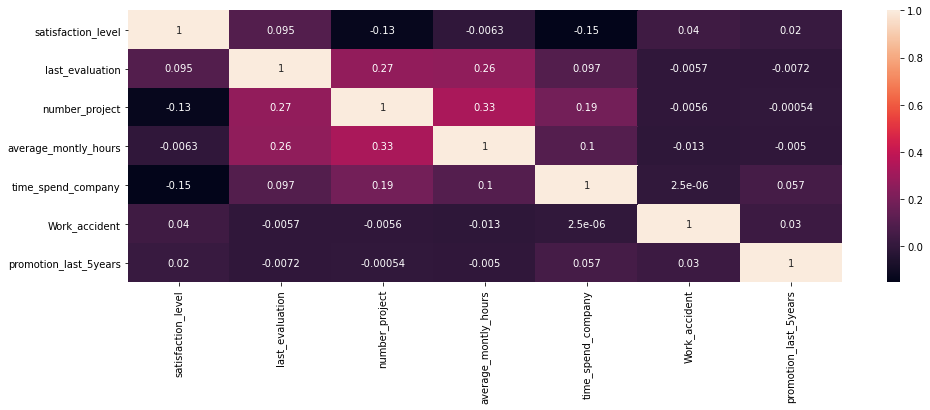

In [11]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(),annot=True)

#Insights

# Satisfaction and number of projects assigned are negatively correlated.
# Satisfaction and last evaluation are positively correlated.
# Satisfaction and time_spend_company are negatively correlated.
# Satisfaction and promotions in last 5 years are negatively correlated.
# Average_monthly hours and last_evaluation are positively correlated.
# Average_monthly hours and number of projects are positively correlated.



In [12]:
features=['dept','number_project','salary','time_spend_company','Work_accident','promotion_last_5years']
features

['dept',
 'number_project',
 'salary',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

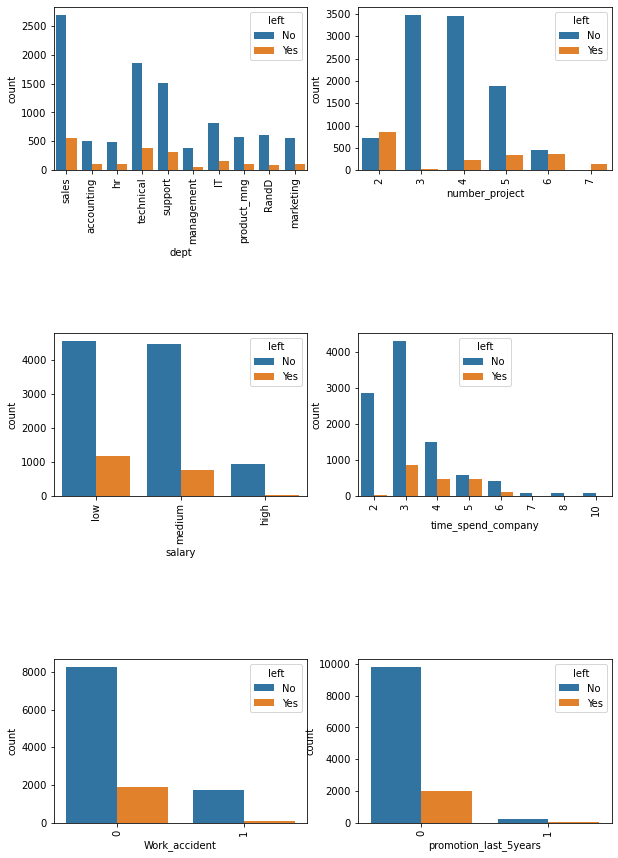

In [13]:
fig=plt.subplots(figsize=(10,15))

for p,q in enumerate(features):
    plt.subplot(3,2,p+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=q,data=data, hue='left')
    plt.xticks(rotation=90)

In [14]:
#Insights

# People with low project as well as people with more number will have higher chance of churning out of the company.

# years of expierence: 3 - 6 years.

# Promotion---> significant role

# salary---> Low, Medium 


# Conclusion:


# Promotion:Likely quit---> Havent  recieved promotion 

# Time with Company: After 3 -6 year Crucial point the employee, affection with organisation.

# Number of project: if the opportunities are less or if the employee is over burdened , more chance of the employeee to quit the jobs.

# Salary : incentives based system to be introduced.


In [15]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low,No
2002,0.82,0.67,2,202,3,0,0,sales,low,No
2003,0.45,0.69,5,193,3,0,0,sales,low,No
2004,0.78,0.82,5,247,3,0,0,sales,low,No
2005,0.49,0.60,3,214,2,0,0,sales,low,No


In [16]:
data['dept'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: dept, dtype: int64

In [17]:
data['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [18]:
data['left'].value_counts()

No     10000
Yes     1991
Name: left, dtype: int64

In [19]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['salary']= label_encoder.fit_transform(data['salary']) 
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,1,No
2002,0.82,0.67,2,202,3,0,0,sales,1,No
2003,0.45,0.69,5,193,3,0,0,sales,1,No
2004,0.78,0.82,5,247,3,0,0,sales,1,No
2005,0.49,0.60,3,214,2,0,0,sales,1,No


In [20]:
dummies = pd.get_dummies(data.dept,drop_first=True)
 
# Concatenate the dummies to original dataframe
data = pd.concat([data, dummies], axis='columns')
 
# drop the values
data.drop(['dept'], inplace=True,axis='columns')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Emp ID,,,,,,,,,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,1,No,0,0,0,0,0,0,1,0,0
2002,0.82,0.67,2,202,3,0,0,1,No,0,0,0,0,0,0,1,0,0
2003,0.45,0.69,5,193,3,0,0,1,No,0,0,0,0,0,0,1,0,0
2004,0.78,0.82,5,247,3,0,0,1,No,0,0,0,0,0,0,1,0,0
2005,0.49,0.60,3,214,2,0,0,1,No,0,0,0,0,0,0,1,0,0


In [21]:
def lefts(x):
    if x=="No":
        return 1
    else:
        return 0

data['left']=data['left'].apply(lefts)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Emp ID,,,,,,,,,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,1,1,0,0,0,0,0,0,1,0,0
2002,0.82,0.67,2,202,3,0,0,1,1,0,0,0,0,0,0,1,0,0
2003,0.45,0.69,5,193,3,0,0,1,1,0,0,0,0,0,0,1,0,0
2004,0.78,0.82,5,247,3,0,0,1,1,0,0,0,0,0,0,1,0,0
2005,0.49,0.60,3,214,2,0,0,1,1,0,0,0,0,0,0,1,0,0


In [22]:
y = data["left"]
X = data.drop("left",axis=1)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [25]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [26]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.827877
[Logistic Regression] test data accuracy is : 0.837015
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.963318
[KNN] training data accuracy is : 0.968307
[KNN] test data accuracy is : 0.940392
[SVM] training data accuracy is : 0.833299
[SVM] test data accuracy is : 0.836599
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.978741
[Naive Bayes] training data accuracy is : 0.825167
[Naive Bayes] test data accuracy is : 0.824510


In [27]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }

In [28]:
model_scores

{'Logistic Regression': 0.8370154230929554,
 'KNN classifier': 0.9403918299291372,
 'Support Vector Machine': 0.8365985827428095,
 'Random forest': 0.9787411421425594,
 'Decision tree': 0.9633180491871614,
 'Naive Bayes': 0.8245102125885786}

In [29]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.837015,0.940392,0.836599,0.978741,0.963318,0.82451


<AxesSubplot:>

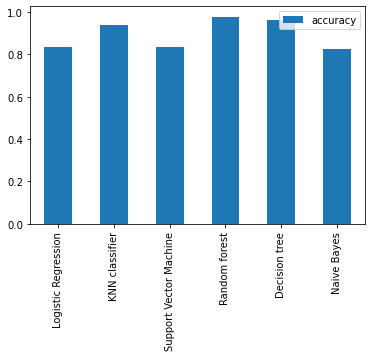

In [30]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [31]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    score1=cross_val_score(a,X,y,cv=10,scoring='accuracy').mean()
    msg1="[%s] score on data  is : %f" % (b,score1)
    print(msg1)

[Logistic Regression] score on data  is : 0.818112
[Decision Tree] score on data  is : 0.966975
[KNN] score on data  is : 0.942457
[SVM] score on data  is : 0.833959
[Random Forest] score on data  is : 0.983988
[Naive Bayes] score on data  is : 0.801351


In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate RF model
from sklearn.model_selection import cross_validate
scores = cross_validate(rm, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.991
Mean recall: 0.998
Mean precision: 0.984


In [47]:
from sklearn.metrics import confusion_matrix
y_pred=rm.predict(X_test)
confusion_matrix(y_test, y_pred)



array([[ 348,   44],
       [   7, 2000]], dtype=int64)

In [48]:
y_pred=rm.predict(X)
confusion_matrix(y, y_pred)

array([[1947,   44],
       [   7, 9993]], dtype=int64)

In [44]:
feature_dict=dict(zip(X,list(rm.feature_importances_)))
feature_dict

{'satisfaction_level': 0.3213529212672162,
 'last_evaluation': 0.12409155655409165,
 'number_project': 0.18441459655862882,
 'average_montly_hours': 0.16398470618992778,
 'time_spend_company': 0.1694804665044651,
 'Work_accident': 0.008311979754910328,
 'promotion_last_5years': 0.001014650740366528,
 'salary': 0.01009677897683072,
 'RandD': 0.0015924944163592091,
 'accounting': 0.0011994850604244124,
 'hr': 0.0014985223438560532,
 'management': 0.0015585354349904811,
 'marketing': 0.0013320186502777862,
 'product_mng': 0.0010190792351008557,
 'sales': 0.0030649198766755695,
 'support': 0.0031483823966219466,
 'technical': 0.0028389060392565724}